# Step 1: Problem Understanding
### Objectives : This project aims to predict whether the loan of the customer will aprove or not

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
# Load the dataset
data = pd.read_csv(r'D:\Data Science 6pm\Projects\Machine Learning Projects\Classification\Bank loan prediction\bank_loan_prediction_dataset.csv')
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
# Lets check the Columns Names
data.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
data['Loan_Status'].value_counts()

Loan_Status
Y    422
N    192
Name: count, dtype: int64

In [7]:
# Checking Missing Values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64


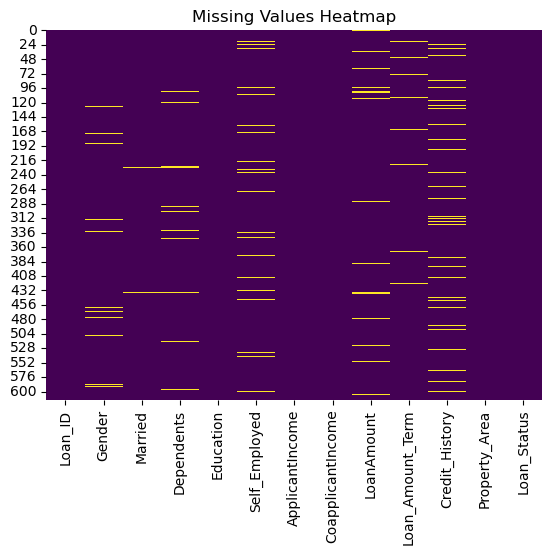

In [8]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

In [9]:
data.shape

(614, 13)

# Step 2: Data Preprocessing
### Clean the data, handle missing values, and encode categorical variables.

In [10]:
# Drop Loan_ID column
data.drop('Loan_ID', axis=1, inplace=True)

In [11]:
# Fill missing values for categorical features with mode
categorical_features = ['Gender', 'Married', 'Dependents', 'Self_Employed', 'Credit_History']
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

In [12]:
# Fill missing values for numerical features with median
numerical_features = ['LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

In [13]:
# Check for remaining missing values
print(data.isnull().sum())

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


In [14]:
data.shape

(614, 12)

In [15]:
# Handle missing values as previously discussed
# Fill missing values for categorical features with mode
categorical_features = ['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area']
for feature in categorical_features:
    data[feature].fillna(data[feature].mode()[0], inplace=True)

# Fill missing values for numerical features with median
numerical_features = ['LoanAmount', 'Loan_Amount_Term']
for feature in numerical_features:
    data[feature].fillna(data[feature].median(), inplace=True)

In [16]:
# Initialize the LabelEncoder
from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder()

# Apply label encoding to 'Gender' and 'Dependents'
#data['Gender'] = labelencoder.fit_transform(data['Gender'])
#data['Dependents'] = labelencoder.fit_transform(data['Dependents'])

# For demonstration, let's label encode all categorical features including 'Gender' and 'Dependents'
# Loop through the categorical features and apply label encoding
for feature in categorical_features:
    data[feature] = labelencoder.fit_transform(data[feature])

# Verify the encoding
#print(data.head())

In [17]:
# If you also need to convert other columns like 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', and 'Loan_Amount_Term'
numerical_columns_to_convert = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term',"Credit_History"]

for column in numerical_columns_to_convert:
    data[column] = data[column].astype(int)

# Display the DataFrame
# print(data)

In [18]:
data['Loan_Status'] = labelencoder.fit_transform(data['Loan_Status'])

In [19]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0


In [20]:
data.shape

(614, 12)

In [21]:
data.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64


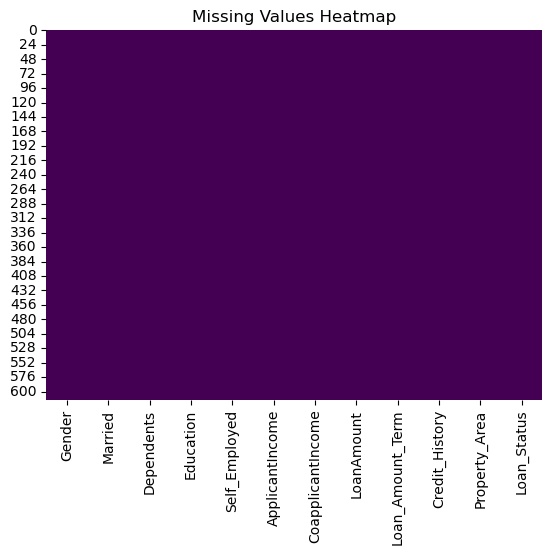

In [22]:
# Check for missing values
missing_values = data.isnull().sum()
print(missing_values)

# Visualize missing values
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

## Note :
* As we can see in the chart there are no yellow lines no missing values
* Dataset is clean no missing values and all the values are in numerical 

# Step 3: Exploratory Data Analysis (EDA)
### Understand the distribution of data and identify patterns.

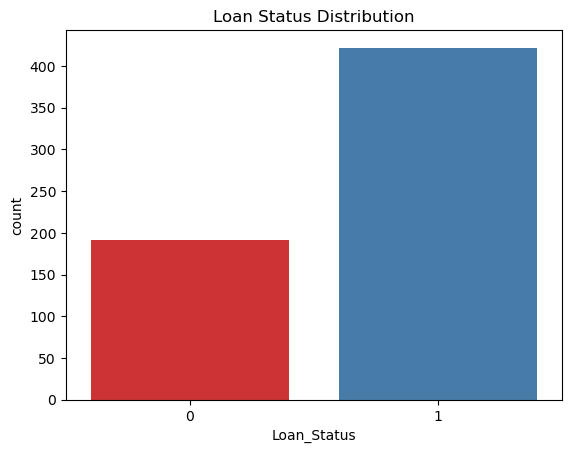

In [23]:
# Plot the distribution of the target variable
sns.countplot(x='Loan_Status', data=data, palette='Set1')
plt.title('Loan Status Distribution')
plt.show()

## Insights :
* More no. of loans are approved

In [24]:
# Plot distribution of categorical variables
categorical_features = data.select_dtypes(include=['object']).columns
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, data=data, palette='Set2')
    plt.title(f'Distribution of {feature}')
    plt.show()

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


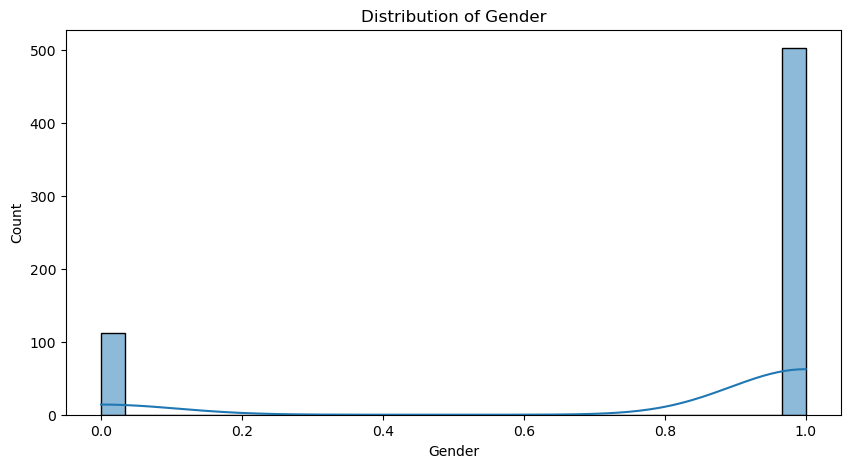

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


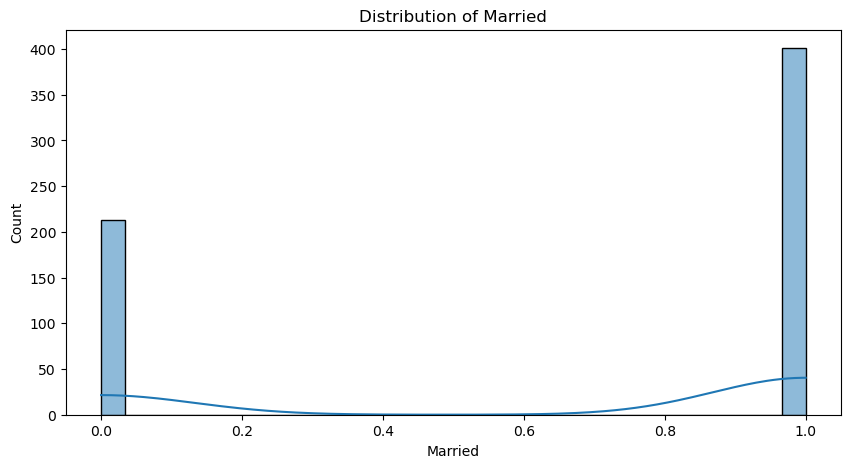

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


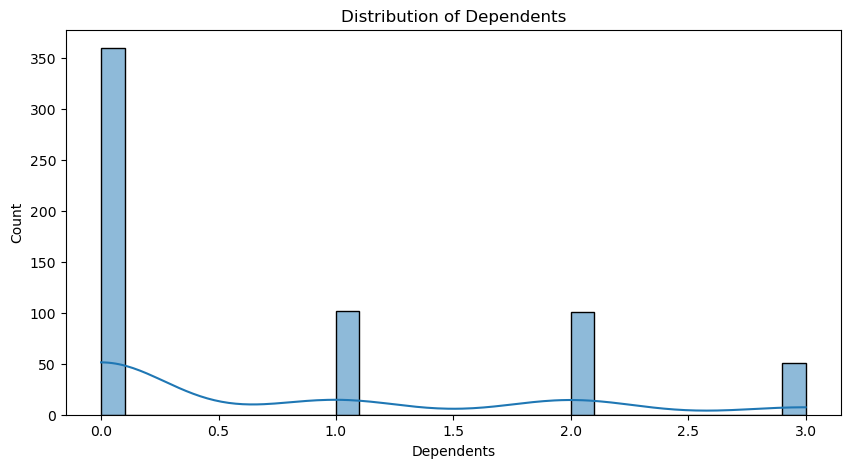

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


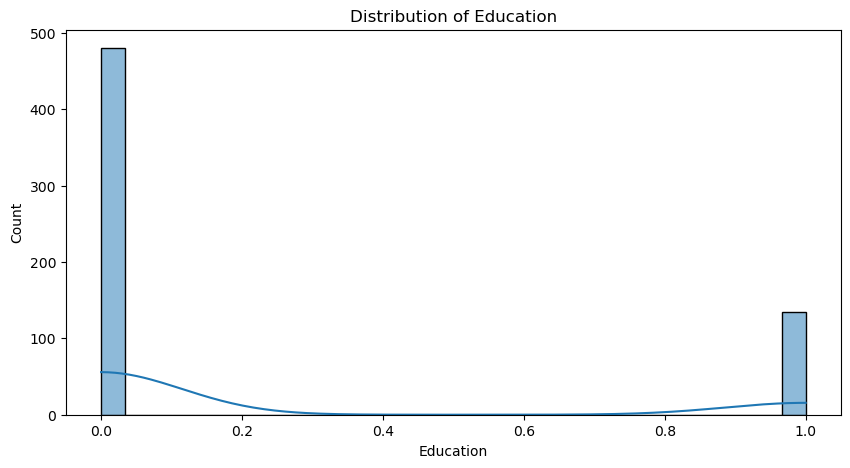

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


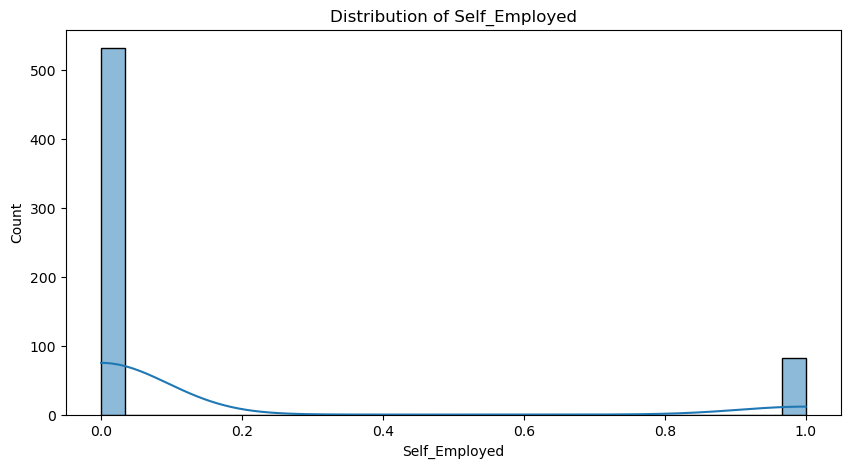

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


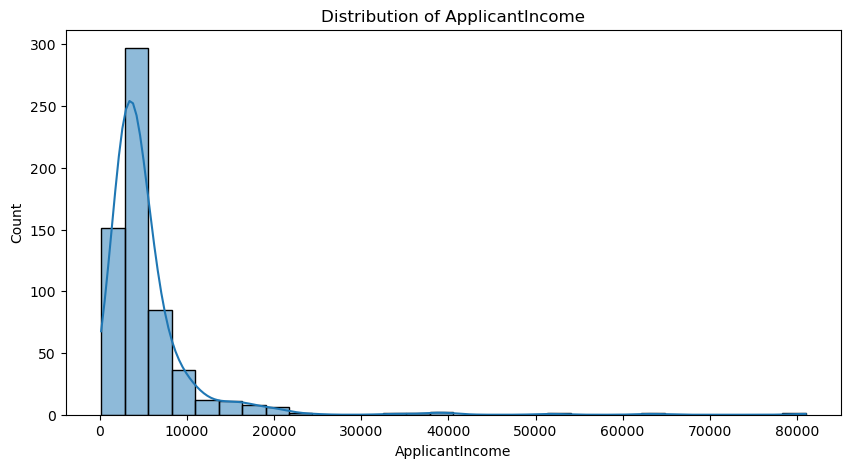

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


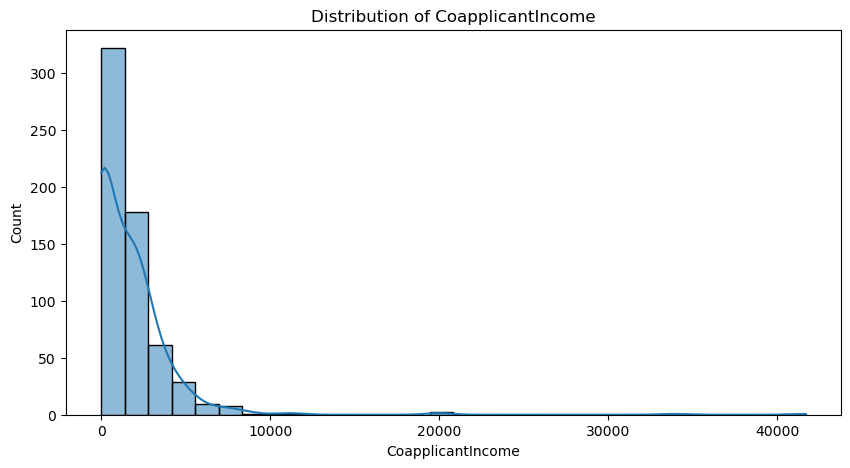

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


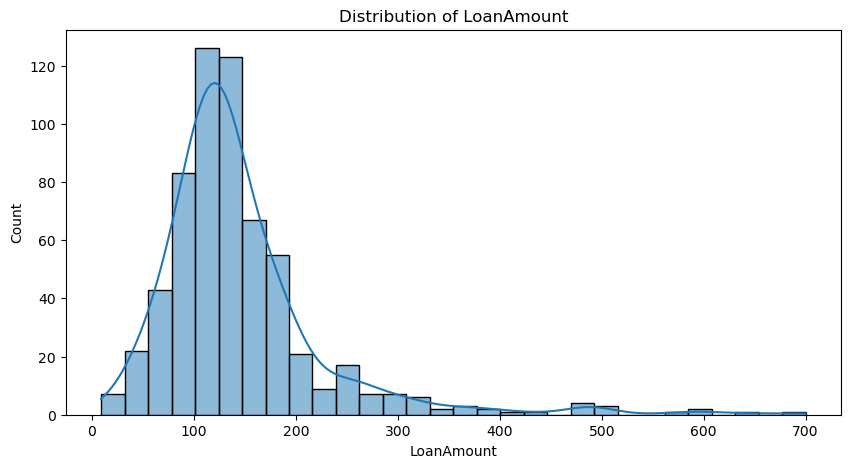

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


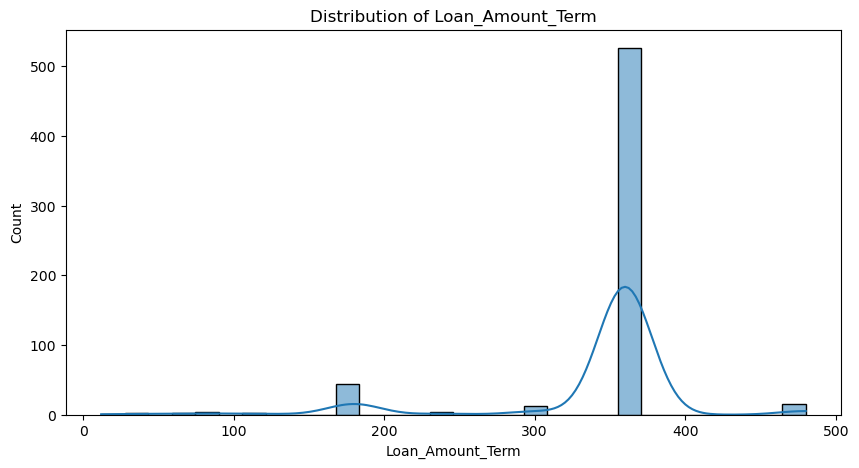

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


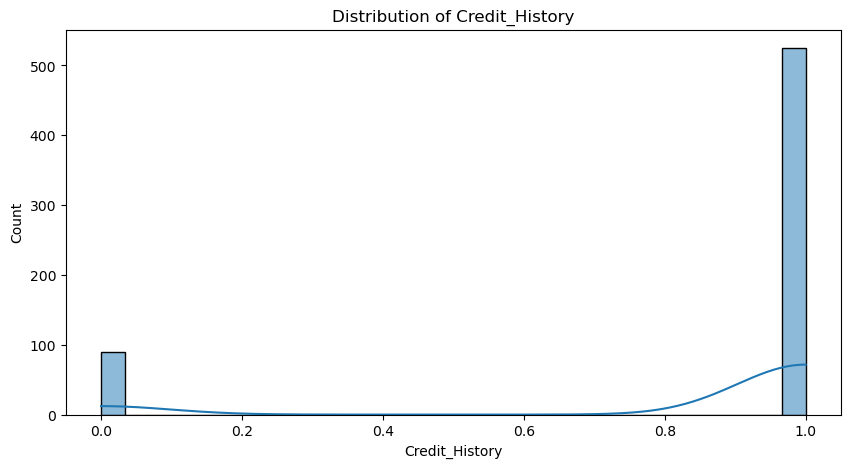

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


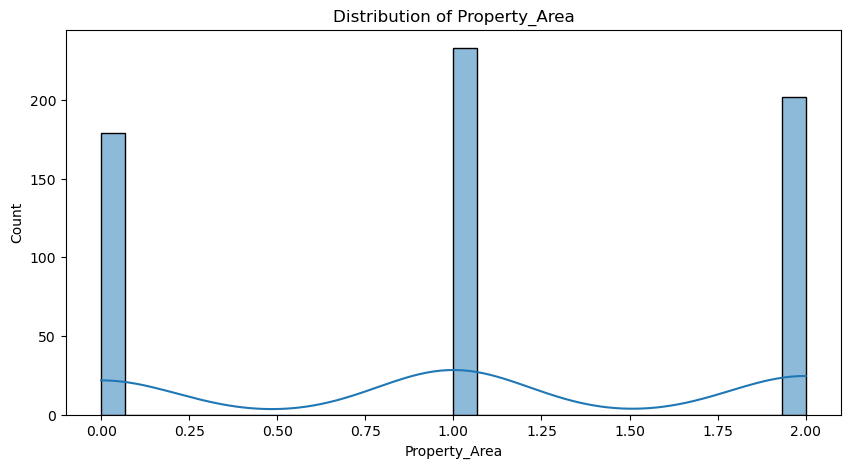

C:\Users\SAMEER\AppData\Local\Temp\ipykernel_20124\4260654771.py:5: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data[feature], kde=True, bins=30, palette='Set3')


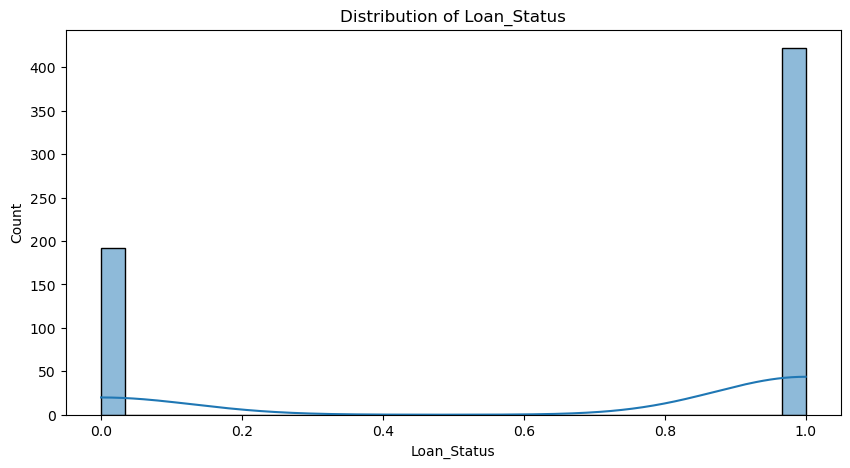

In [25]:
# Plot distribution of numerical variables
numerical_features = data.select_dtypes(include=[np.number]).columns
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.histplot(data[feature], kde=True, bins=30, palette='Set3')
    plt.title(f'Distribution of {feature}')
    plt.show()

In [26]:
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Loan_Status', data=data, palette='Set1')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

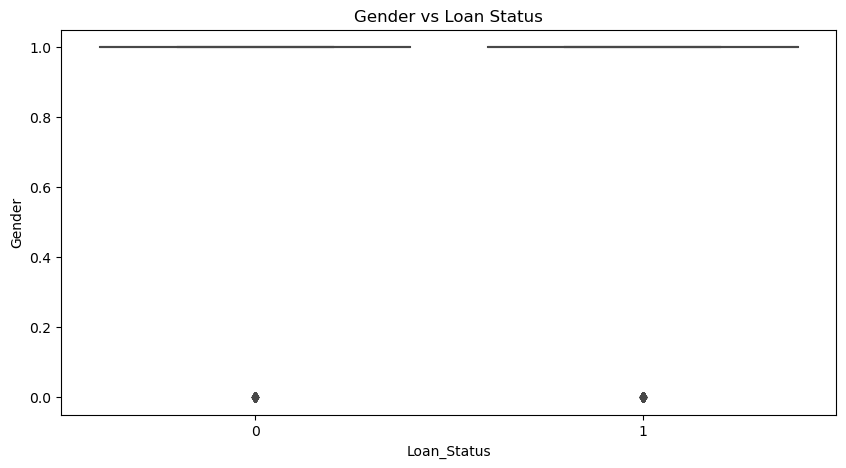

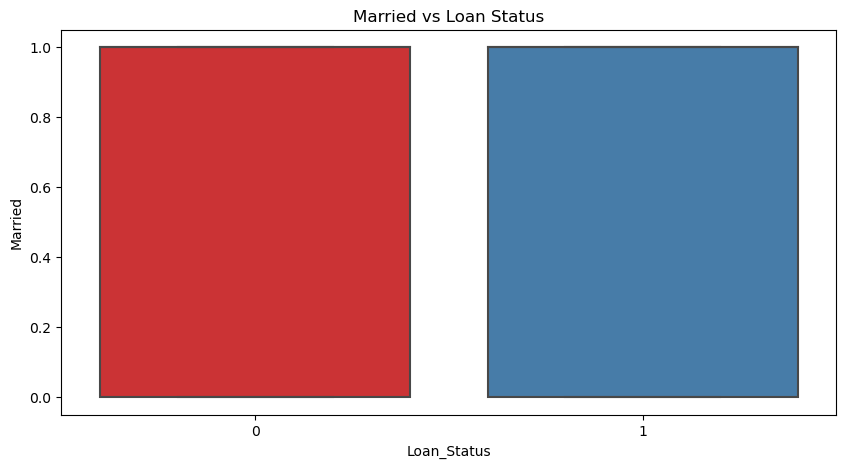

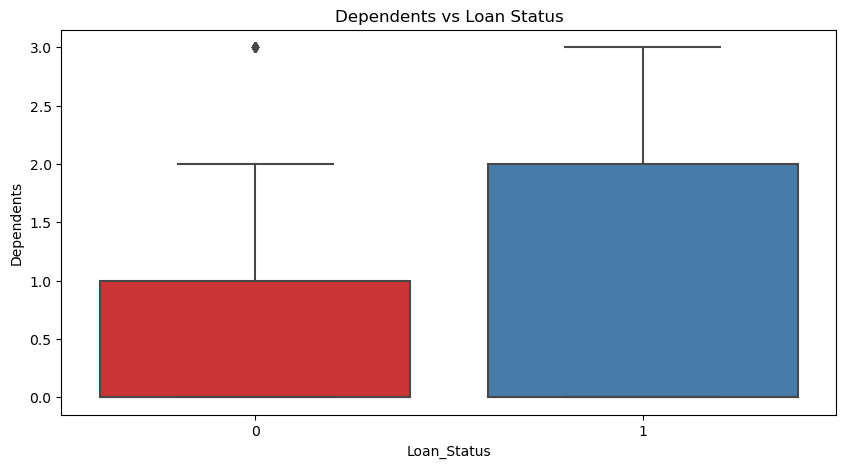

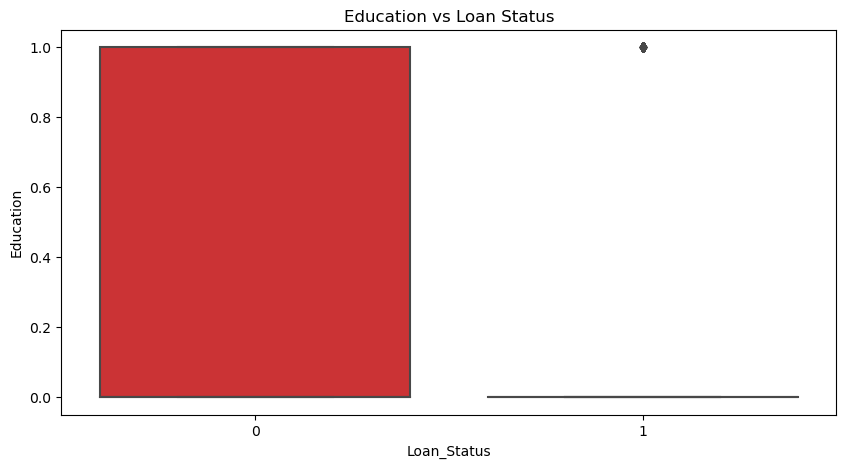

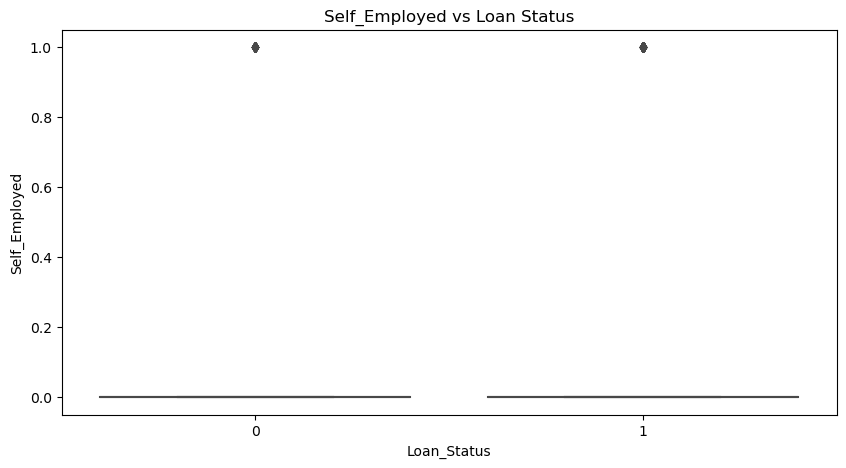

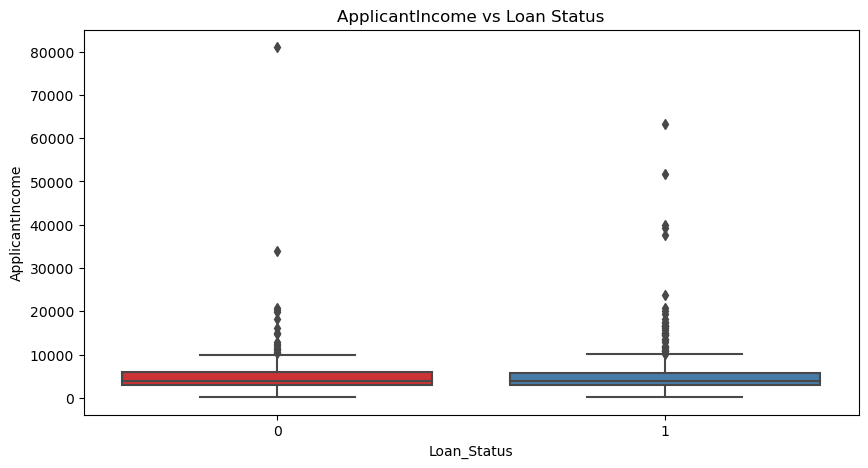

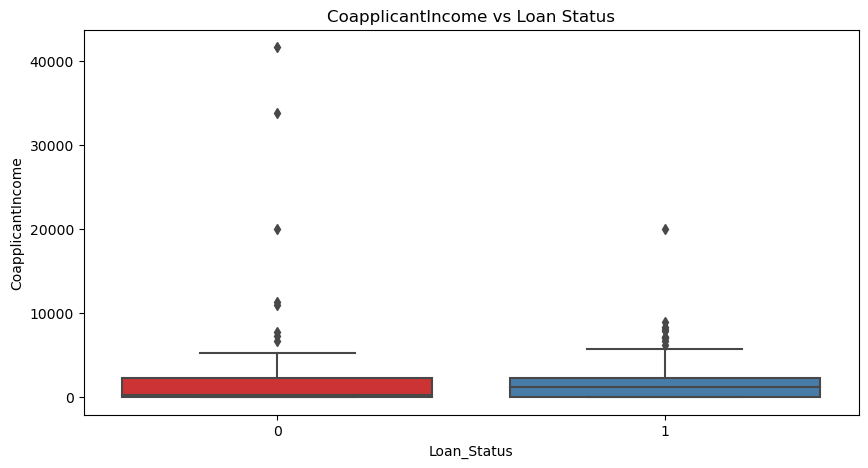

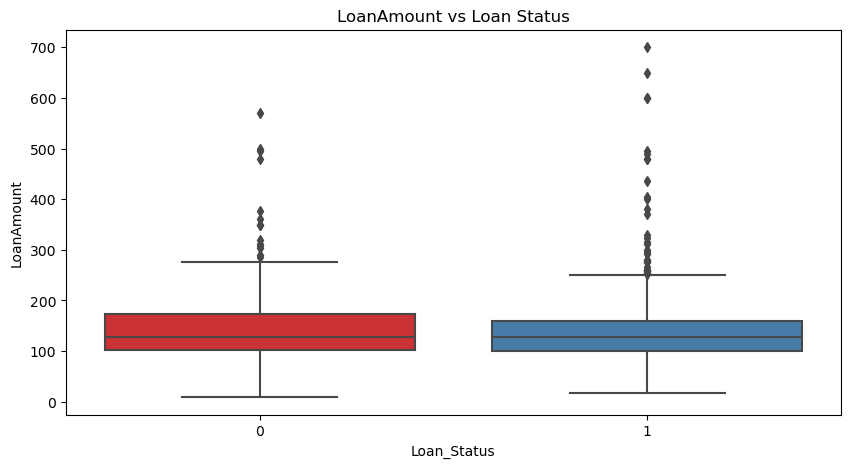

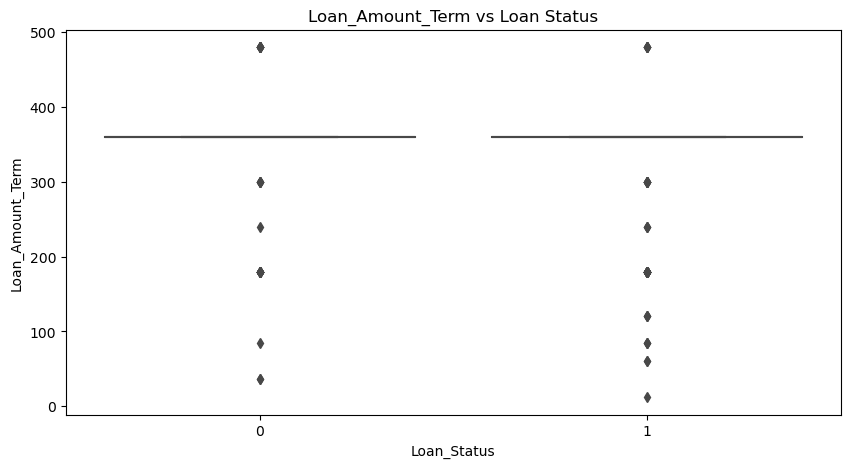

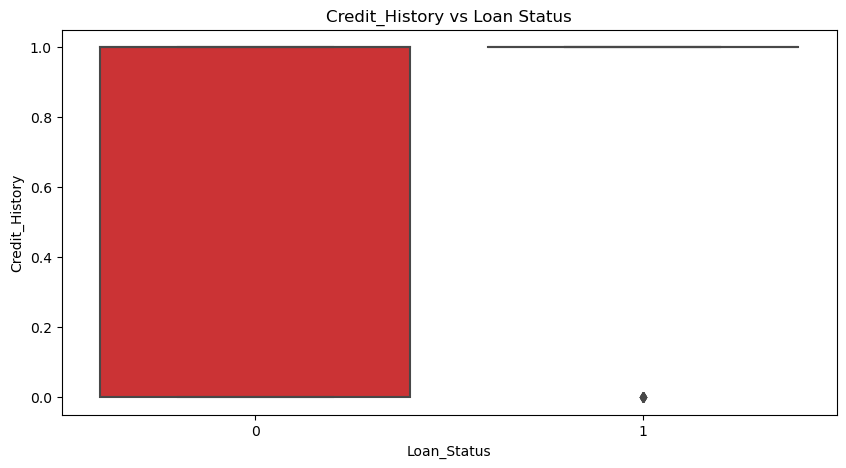

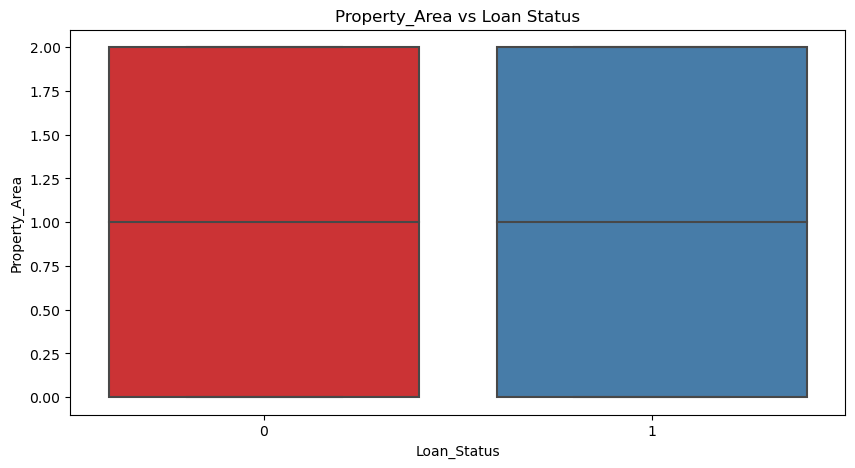

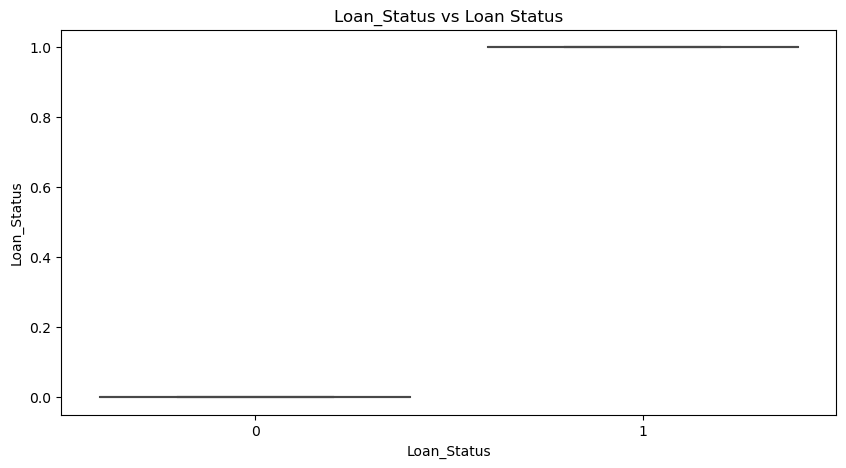

In [27]:
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Loan_Status', y=feature, data=data, palette='Set1')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

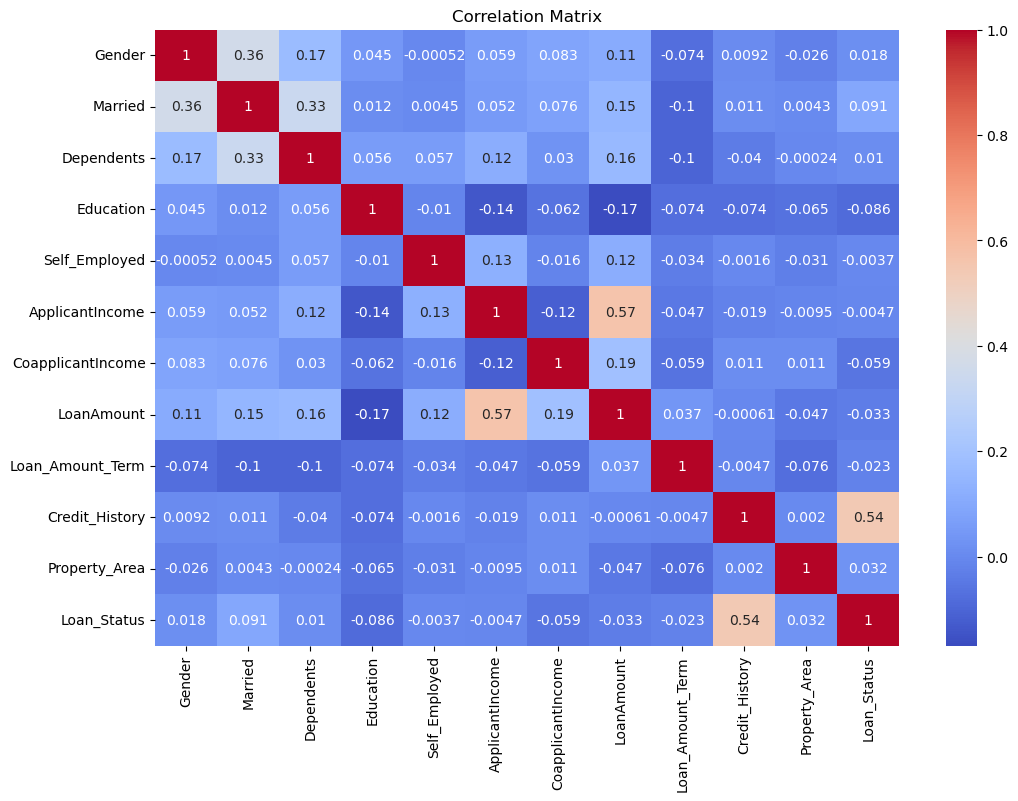

In [28]:
# Correlation matrix
plt.figure(figsize=(12, 8))
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

C:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


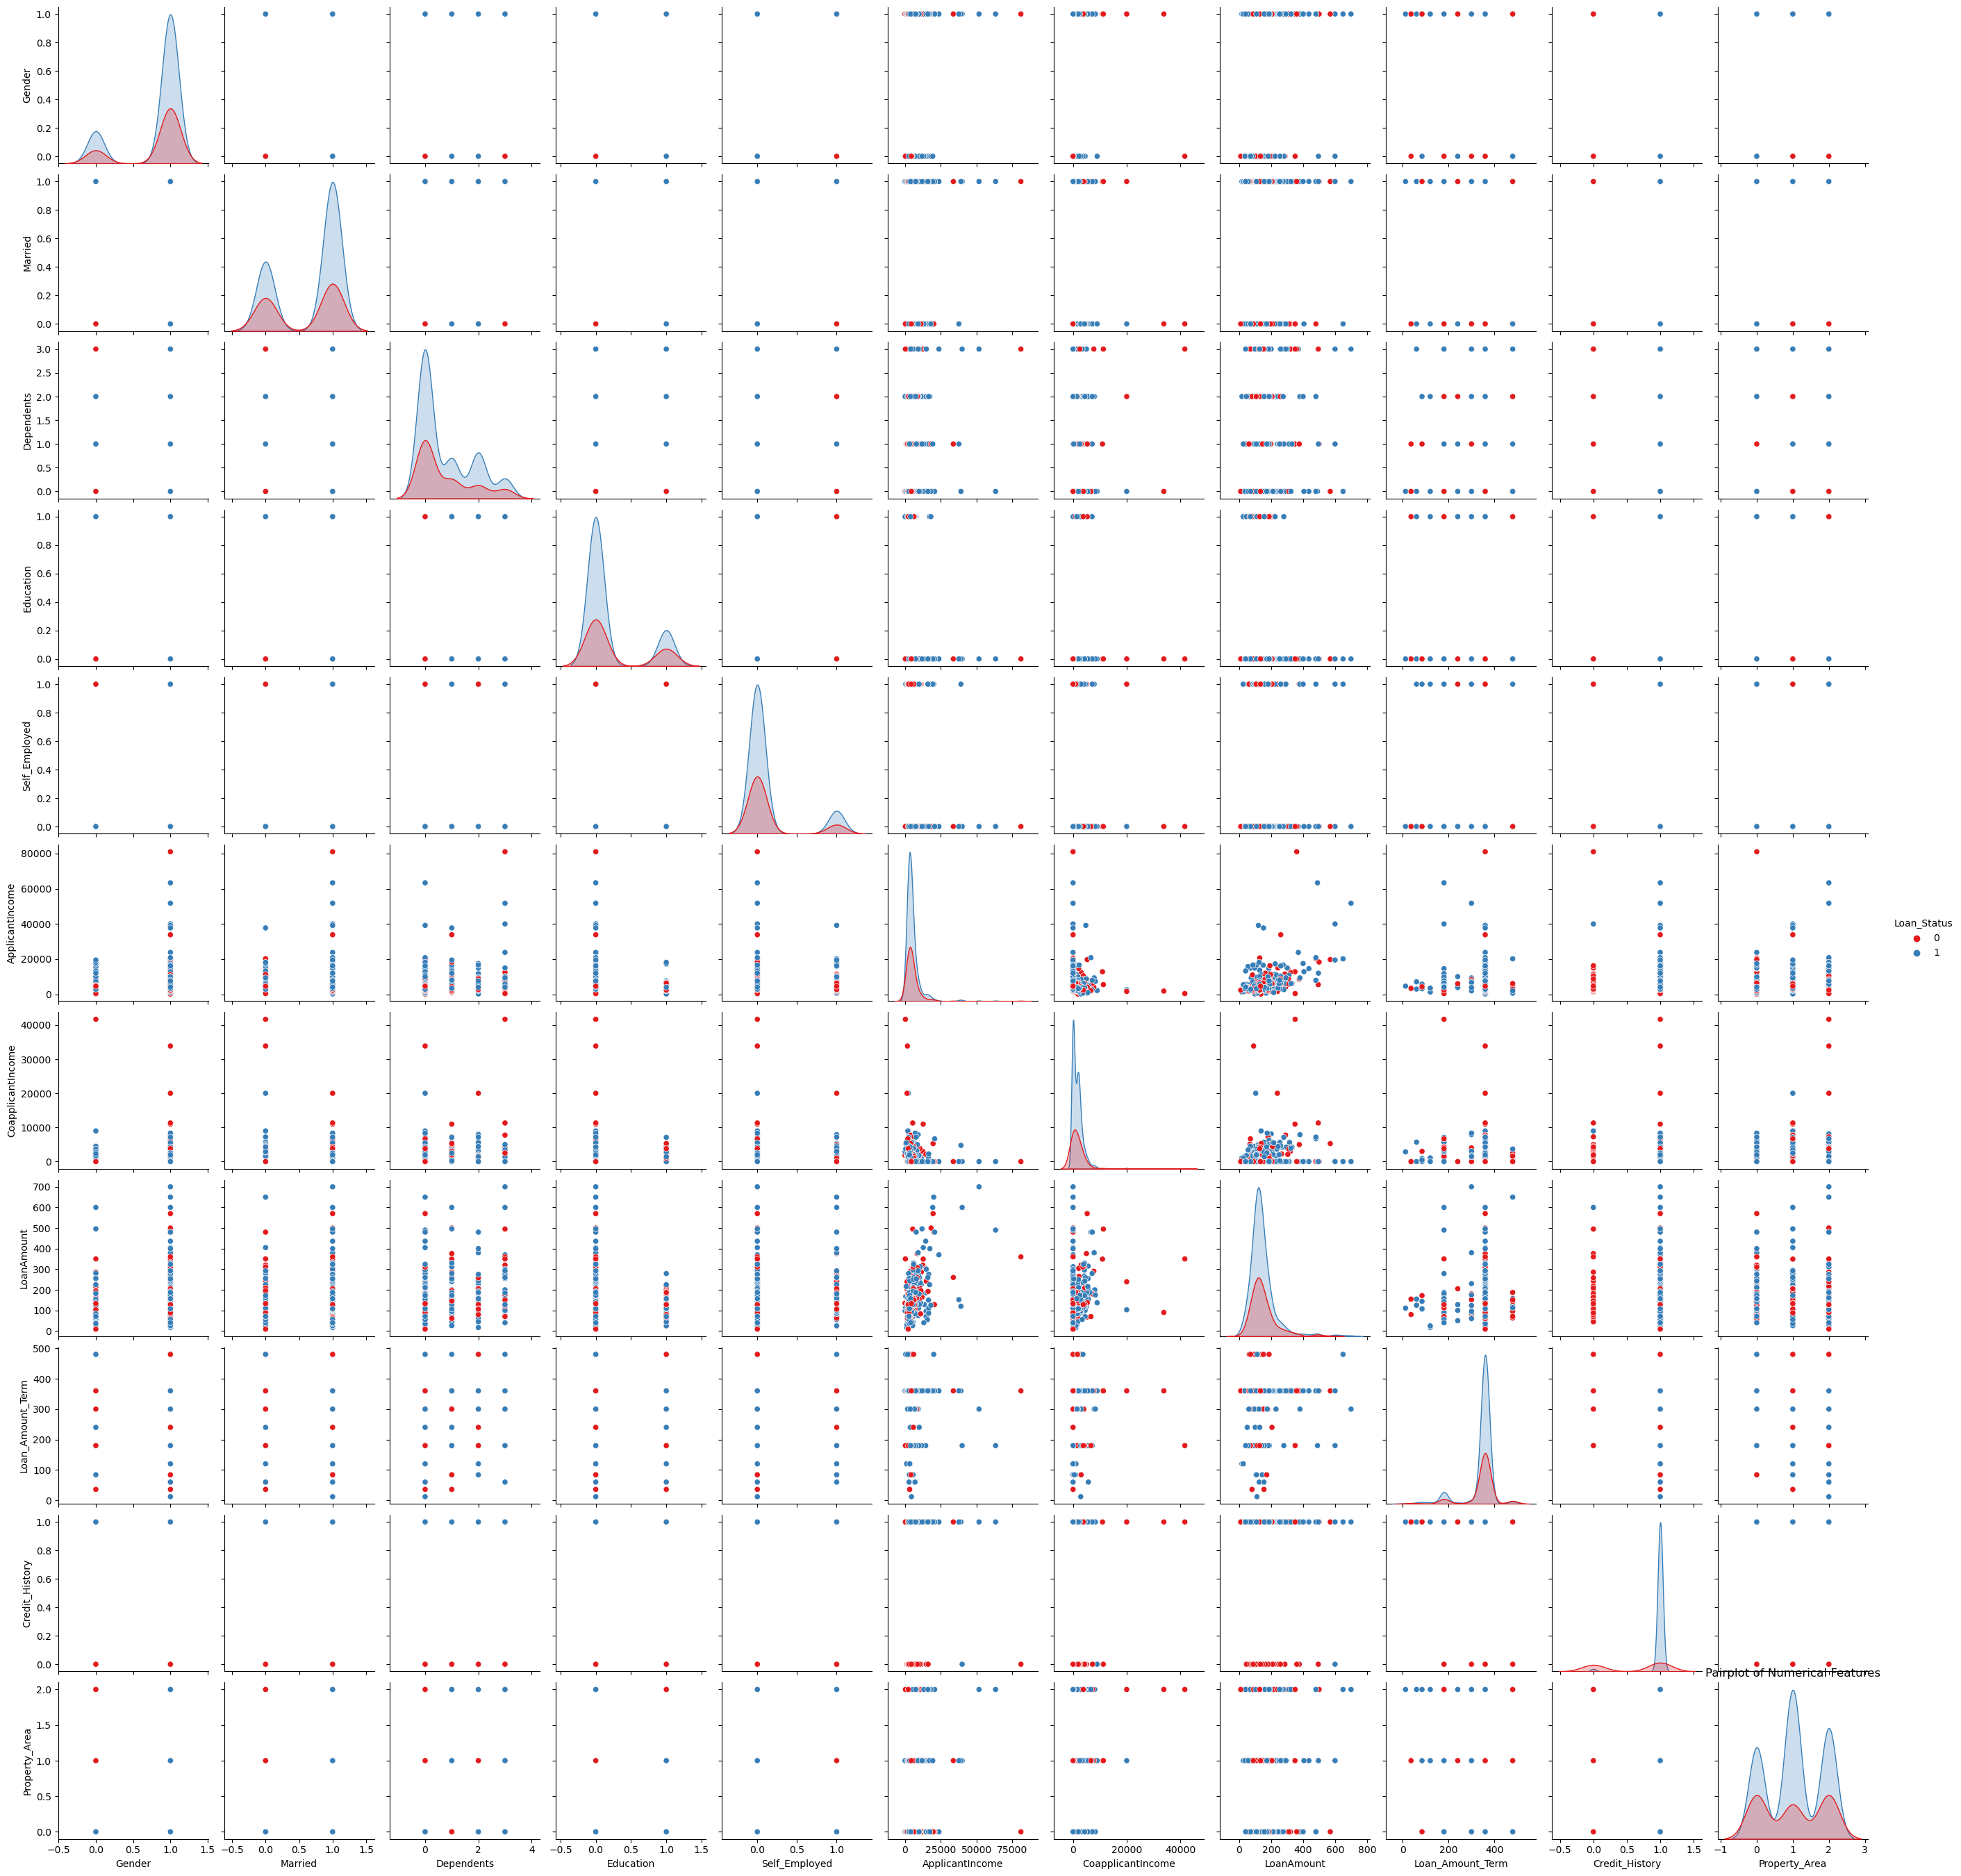

In [29]:
# Pairplot of numerical features colored by Loan Status
sns.pairplot(data, hue='Loan_Status', palette='Set1')
plt.title('Pairplot of Numerical Features')
plt.show()

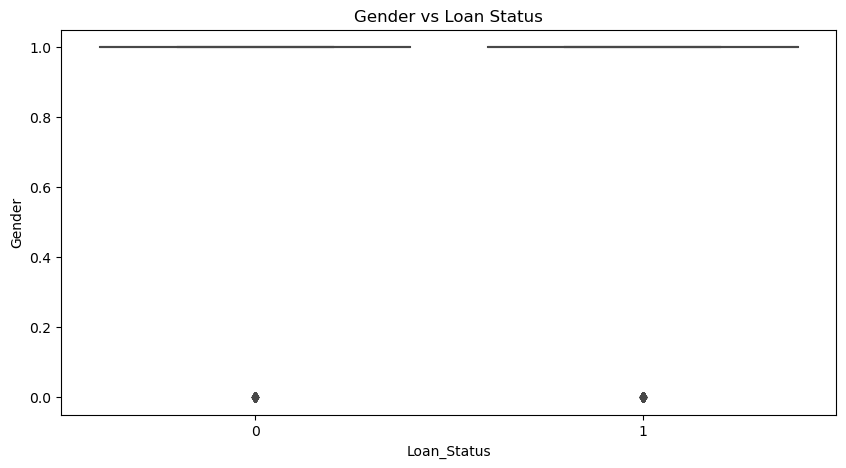

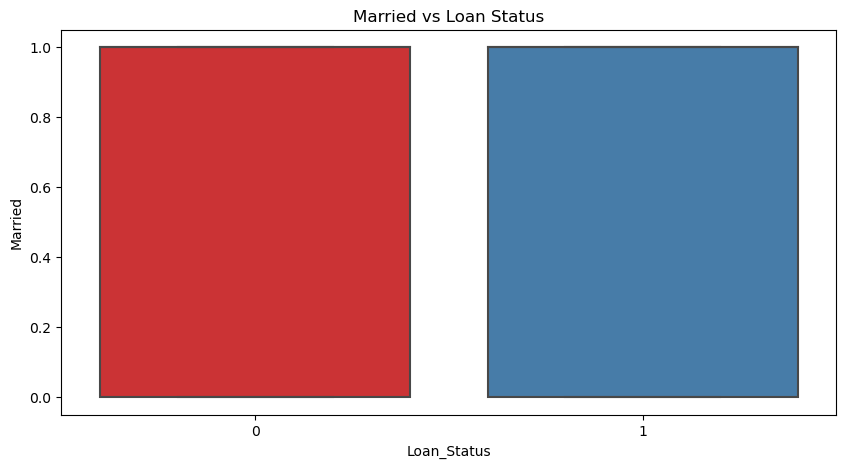

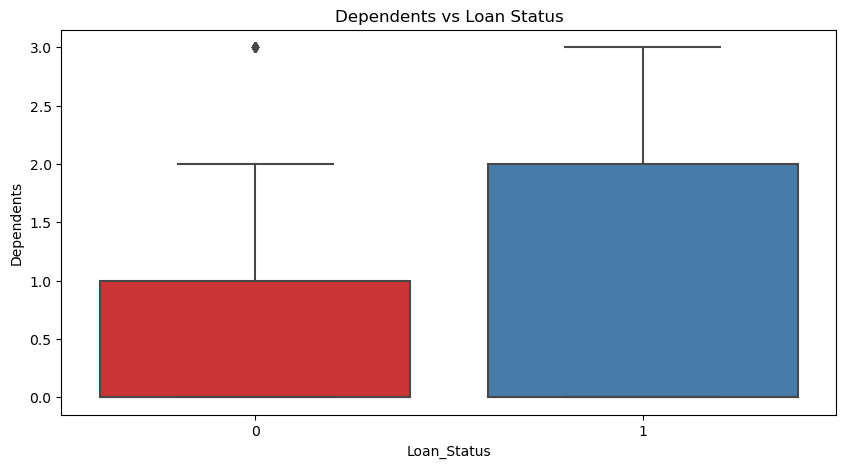

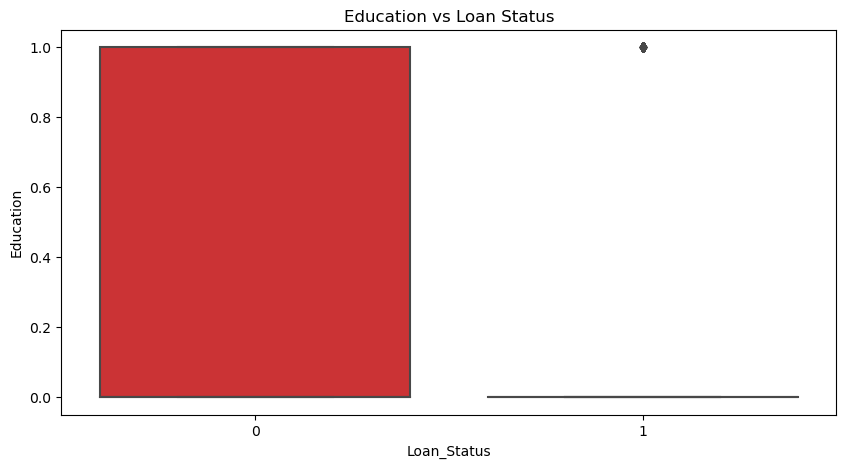

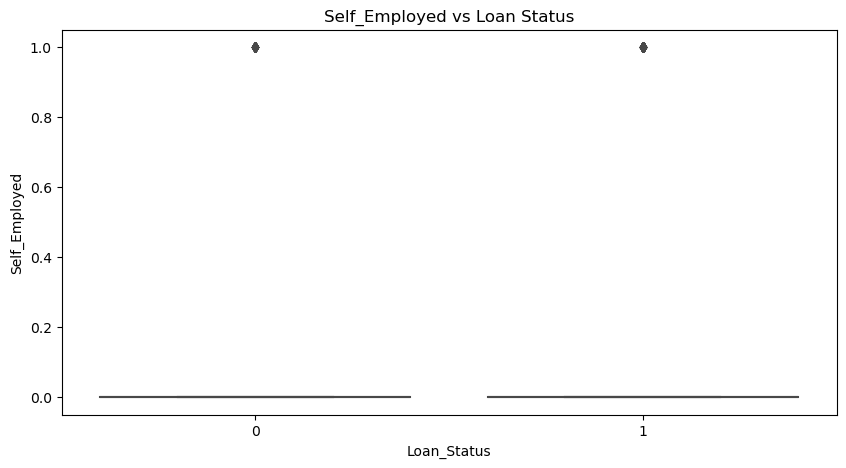

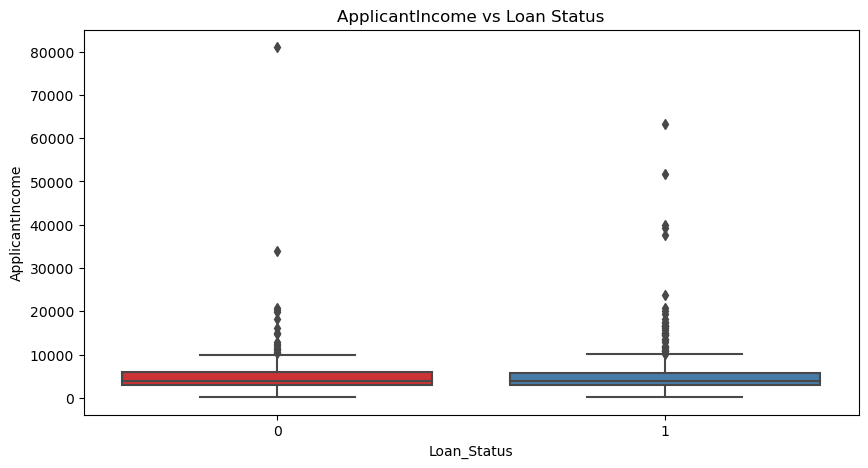

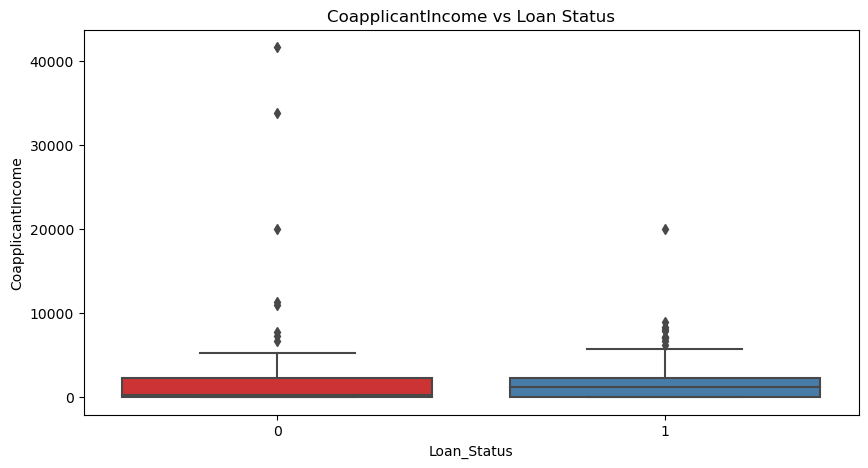

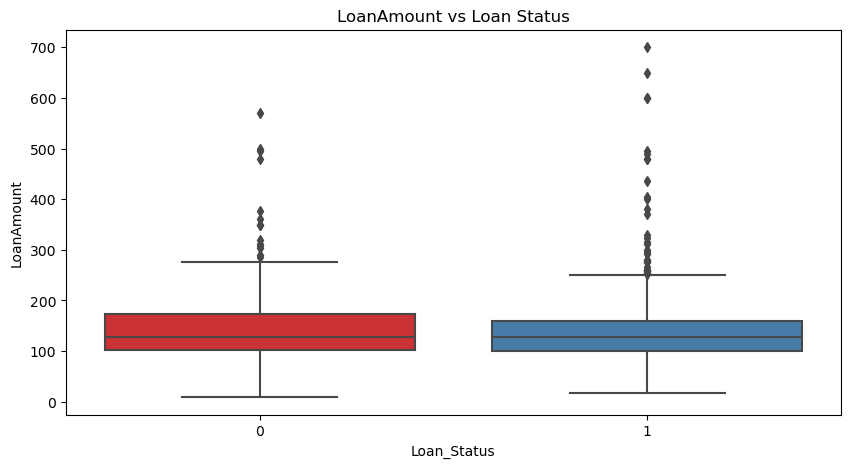

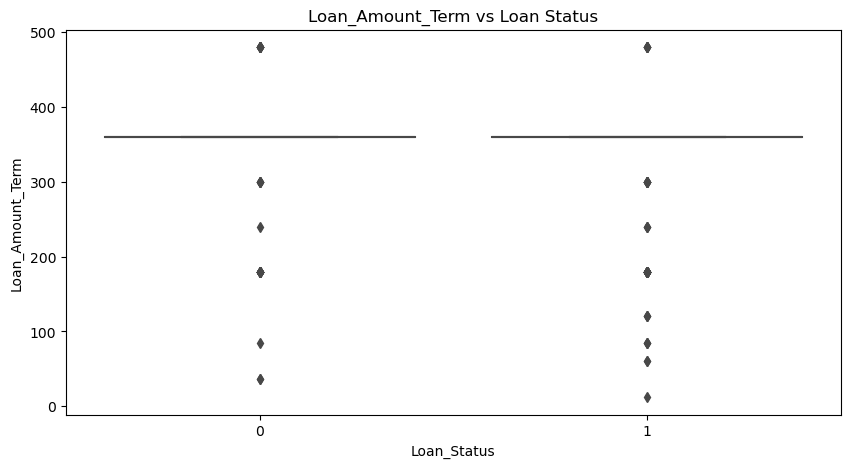

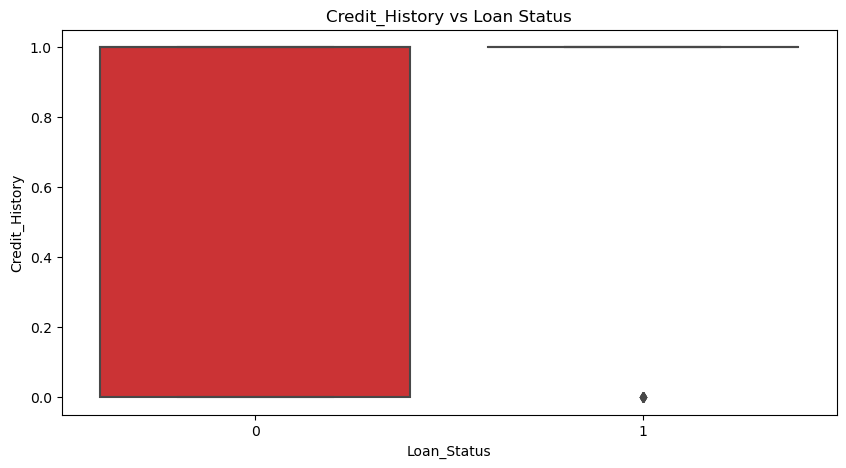

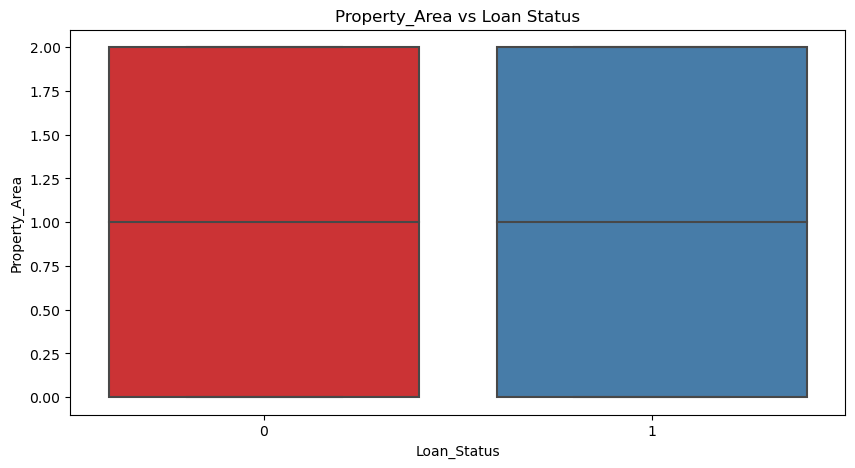

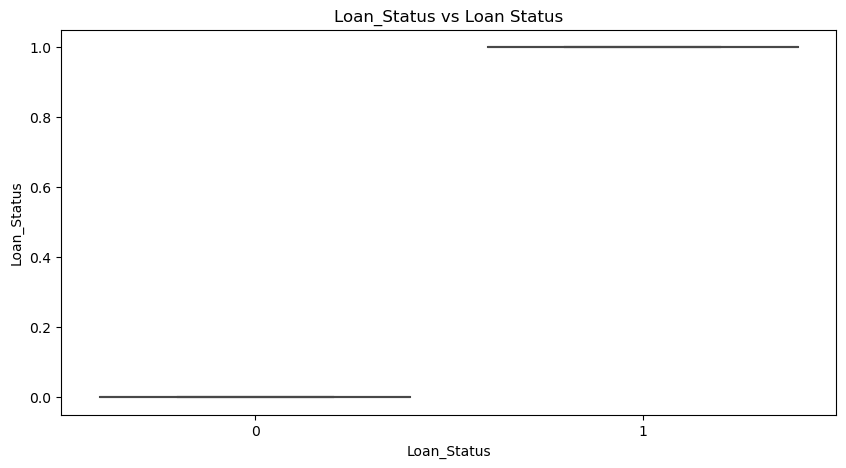

In [30]:
# Bivarient analysis
# Categorical Features vs. Loan Status
for feature in categorical_features:
    plt.figure(figsize=(10, 5))
    sns.countplot(x=feature, hue='Loan_Status', data=data, palette='Set1')
    plt.title(f'{feature} vs Loan Status')
    plt.show()

# Numerical Features vs. Loan Status
for feature in numerical_features:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x='Loan_Status', y=feature, data=data, palette='Set1')
    plt.title(f'{feature} vs Loan Status')
    plt.show()


### Multivarient analysis 

In [31]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   Gender             614 non-null    int32
 1   Married            614 non-null    int32
 2   Dependents         614 non-null    int32
 3   Education          614 non-null    int32
 4   Self_Employed      614 non-null    int32
 5   ApplicantIncome    614 non-null    int32
 6   CoapplicantIncome  614 non-null    int32
 7   LoanAmount         614 non-null    int32
 8   Loan_Amount_Term   614 non-null    int32
 9   Credit_History     614 non-null    int32
 10  Property_Area      614 non-null    int32
 11  Loan_Status        614 non-null    int32
dtypes: int32(12)
memory usage: 28.9 KB


# Step 4: Feature Engineering

In [32]:
# Splitting the data into features and target variable
X = data.drop('Loan_Status', axis=1)
y = data['Loan_Status']

In [34]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
print(standardized_data)

[[ 0.47234264 -1.37208932 -0.73780632 ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.41173269
  -1.31851281]
 [ 0.47234264  0.72881553 -0.73780632 ...  0.2732313   0.41173269
   1.22329839]
 ...
 [ 0.47234264  0.72881553  0.25346957 ...  0.2732313   0.41173269
   1.22329839]
 [ 0.47234264  0.72881553  1.24474546 ...  0.2732313   0.41173269
   1.22329839]
 [-2.11710719 -1.37208932 -0.73780632 ...  0.2732313  -2.42876026
  -0.04760721]]


In [35]:
# Splitting into training and testing sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [36]:
X_train.shape , X_test.shape

((491, 11), (123, 11))

In [37]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0
2,1,1,0,0,1,3000,0,66,360,1,2,1
3,1,1,0,1,0,2583,2358,120,360,1,2,1
4,1,0,0,0,0,6000,0,141,360,1,2,1


# Step 5: Model Selection and Training
### 1.a Random forest classifier

In [38]:
# Training the Random Forest Classification model on the Training set
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
#classifier = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
# Predictions
y_pred = rfc.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])

In [40]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predictions
y_pred = rfc.predict(X_test)

# Evaluation metrics
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

[[18 25]
 [ 4 76]]
              precision    recall  f1-score   support

           0       0.82      0.42      0.55        43
           1       0.75      0.95      0.84        80

    accuracy                           0.76       123
   macro avg       0.79      0.68      0.70       123
weighted avg       0.78      0.76      0.74       123

Accuracy: 0.7642276422764228


### 1.b Random Forest Classifier with Grid Search CV

In [41]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Initialize the model
model = RandomForestClassifier()

# Hyperparameter tuning
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

In [42]:
# Predictions
y_pred = best_model.predict(X_test)
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

# Step 6: Model Evaluation
### Evaluate the model on the test set.

In [43]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Evaluation metrics
print(confusion_matrix(y_test, y_pred))

[[18 25]
 [ 2 78]]


In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.90      0.42      0.57        43
           1       0.76      0.97      0.85        80

    accuracy                           0.78       123
   macro avg       0.83      0.70      0.71       123
weighted avg       0.81      0.78      0.75       123



In [45]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')

Accuracy: 0.7804878048780488


In [46]:
# Save the model and scaler
import joblib
joblib.dump(rfc, 'loan_prediction_model.pkl')
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

# Step 7: Model Deployment
### Deploy the model using Flask.

In [47]:
data.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0,128,360,1,2,1
1,1,1,1,0,0,4583,1508,128,360,1,0,0


In [48]:
import numpy as np
import joblib

# Load the trained model
model = joblib.load('loan_prediction_model.pkl')

# Load the scaler
scaler = joblib.load('scaler.pkl')

# New input data for prediction
# Example input data should have 11 features, ensure it's the same as training data structure
input_data = (1, 1, 1, 1, 0, 4000, 1500, 129, 360, 1, 0)  # Adjusted to have 11 features

# Convert input data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# Reshape the array for a single instance prediction
input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# Standardize the input data
std_data = scaler.transform(input_data_reshaped)

# Make a prediction
prediction = model.predict(std_data)

# Print the prediction result
if prediction[0] == 0:
    print('Loan not approved')
else:
    print('Loan approved')


Loan not approved


C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
C:\Users\SAMEER\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [49]:
# import numpy as np
# import joblib

# # Load the trained model
# model = joblib.load('loan_prediction_model.pkl')

# # Load the scaler
# #scaler = joblib.load('scaler.pkl')  # Ensure you have saved the scaler used during training

# # Input data for prediction
# input_data = (1,0,0,0,0, 6000,0,120,360,1,0)

# # Convert input data to numpy array
# input_data_as_numpy_array = np.asarray(input_data)

# # Reshape the array for a single instance prediction
# input_data_reshaped = input_data_as_numpy_array.reshape(1, -1)

# # Standardize the input data (if required)
# #std_data = scaler.fit_transform(input_data_reshaped)
# #X_train_scaled = scaler.fit_transform(X_train)


# # Make a prediction
# prediction = best_model.predict(X_test)


# # Print the prediction result
# if prediction[0] == 1:
#     print('Loan not approved')
# else:
#     print('Loan approved')


###### 